In [1]:
#!/usr/bin/env python3
# inagler 16/09/23

### INITIALISATION ###

import numpy as np          # fundamental package for scientific computing
import glob                 # return all file paths that match a specific pattern
#import ruptures as rpt      # for off-line change point detection
import os                   # to interact with the operating system
import matplotlib.pyplot as plt

files = glob.glob(os.path.expanduser('~/phase1_CONDA/timeseries/demeaned/*.npy'))
raw_files = glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/*time_series.npy')

In [2]:
raw_files[5]

'/home/innag3580/phase1_CONDA/timeseries/rapi_dens_time_series.npy'

In [3]:
raw_files[0][40:-16]

'OSNAPeast'

# find range of raw time series

In [4]:
h=8

hist_end = (2014-1850)*12
time_annual = np.arange(1850,1850+hist_end/12)

# Load your data
signals = np.load(raw_files[h])
signals = signals[:hist_end]

# Get the number of time series
num_time_series = signals.shape[1]

# Define the window size
window_size = 40
# Define the duration threshold
duration_threshold = 20
# Compute entire period
period = window_size + duration_threshold

# Define the threshold factor
threshold_multiple = 3

# Define a dictionary to store criteria_indices for each i value
criteria_indices_dict = {}

# Iterate over each time series
for i in range(num_time_series):
    # Select time series
    signal = signals[:, i]

    # Calculate the annual means by averaging the values in each row
    reshaped_data = signal.reshape(-1, 12)
    annual_means = np.mean(reshaped_data, axis=1)
    
    # prepare data
    criteria_indices = []
    
    # Start after first window size
    for j in range(window_size, len(annual_means)-duration_threshold):
        
        # Compute mean and std of compariosn window
        window = annual_means[j-window_size:j]
        std_window = np.std(window)
        avg_window = np.mean(window)

        # compute mean of range of interest
        threshold = annual_means[j:j+duration_threshold]
        avg_threshold = np.mean(threshold)
        
        # Check if the std is above the threshold
        if avg_threshold >= avg_window + (threshold_multiple * std_window) or avg_threshold <= avg_window - (threshold_multiple * std_window):

            if len(criteria_indices) == 0:
                criteria_indices.append(j)
                print(len(criteria_indices))
                
            elif j >= criteria_indices[-1] + duration_threshold:
                criteria_indices.append(j)
                print(len(criteria_indices))
                
        # Save criteria_indices in the dictionary
        criteria_indices_dict[i] = criteria_indices
        
    # Plot if indices list has at least one entry
    if criteria_indices:
        
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # plot time series
        plt.plot(time_annual, annual_means, label='Raw time series', linewidth=2)
        
        # Iterate through the indices and create axvspan for consecutive values
        start = criteria_indices[0] + 1850
        for k in range(1, len(criteria_indices)):
            if criteria_indices[k] != criteria_indices[k - 1] + 1:
                end = criteria_indices[k - 1]+duration_threshold + 1850
                ax.axvspan(start, end, alpha=0.5, color='lightblue')
                ax.axvspan(start-window_size, start, alpha=0.5, color='lightcoral')
                start = criteria_indices[k] + 1850
                
        # Specify change point criteria
        legend_text = ' window 1 = '+ str(window_size) + ' years , window 2 = '+ str(duration_threshold) + ' years , threshold factor = '+ str(threshold_multiple)
        ax.annotate(legend_text, xy=(0, 0), xycoords='axes fraction', ha='left', va='bottom', fontsize=12, color='k')
        
        # Add one more axvspan for the last consecutive values
        end = criteria_indices[-1]+duration_threshold + 1850
        ax.axvspan(start-window_size, start, alpha=0.5, color='lightcoral', label='before')
        ax.axvspan(start, end, alpha=0.5, color='lightblue', label='after')

        plt.title(raw_files[h][40:-16] + f' time series {i}', fontsize=18)
        plt.legend(fontsize=14)
        plt.xlabel('Time [Years]', fontsize=16)
        plt.ylabel('Transport Anomaly [Sverdrup]', fontsize=16)
        ax.xaxis.set_tick_params(labelsize=14)
        ax.yaxis.set_tick_params(labelsize=14)
        
        #plt.show()
        plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+raw_files[h][40:-16]+'raw_event_ts_'+str(i)+'.png', bbox_inches='tight', dpi=300)

# find range of detrended time series

1
start: 1918 end: 1938
1
start: 1917 end: 1937
1
start: 1894 end: 1914
1
start: 1909 end: 1929
1
2
start: 1930 end: 1950
start: 1950 end: 1970
1
start: 2004 end: 2024


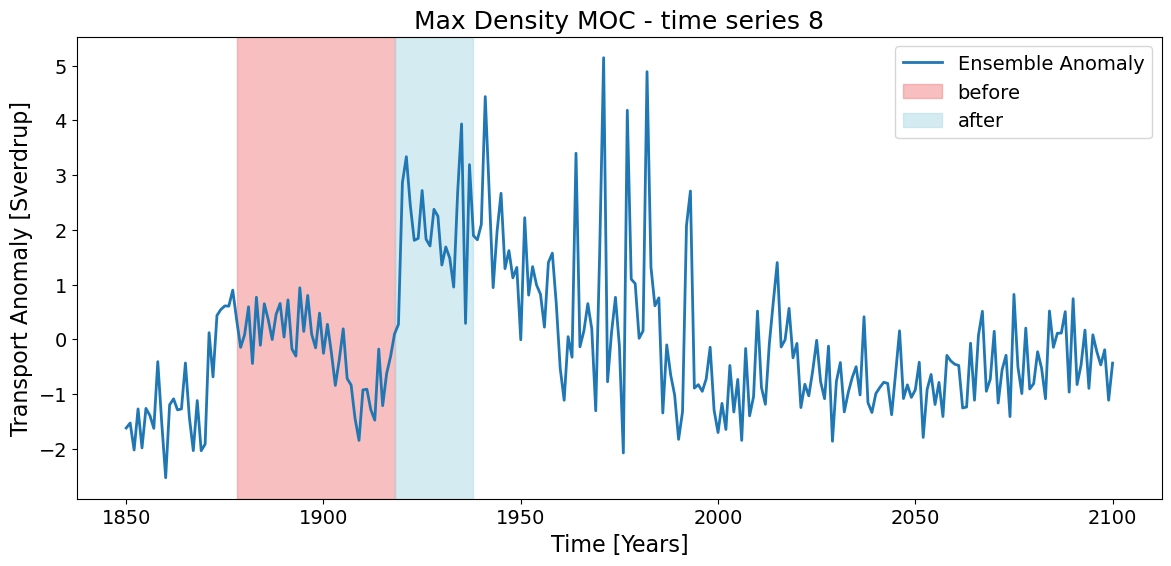

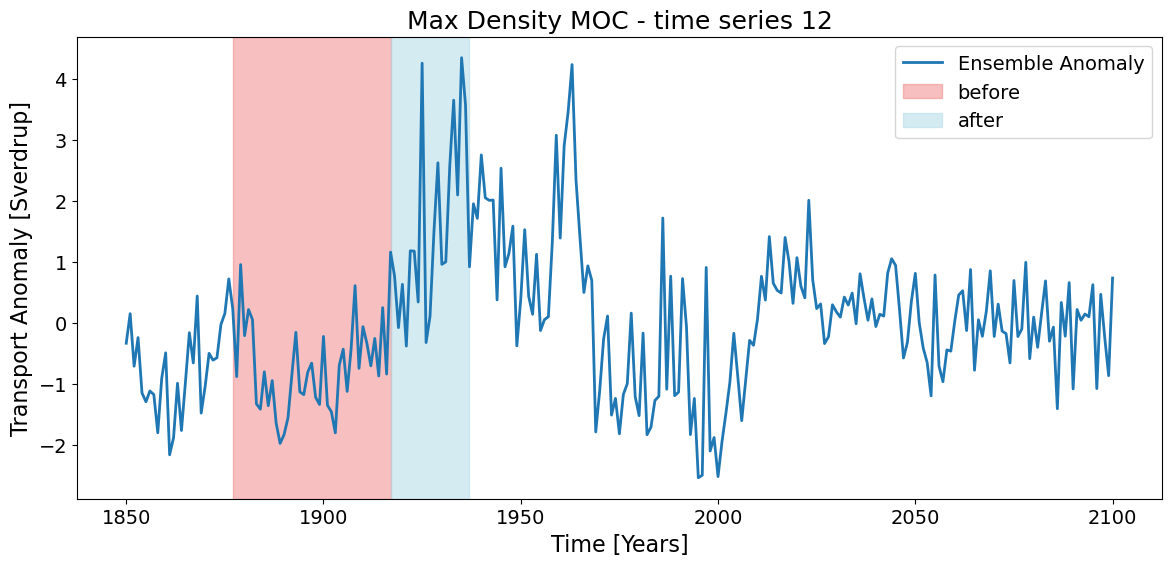

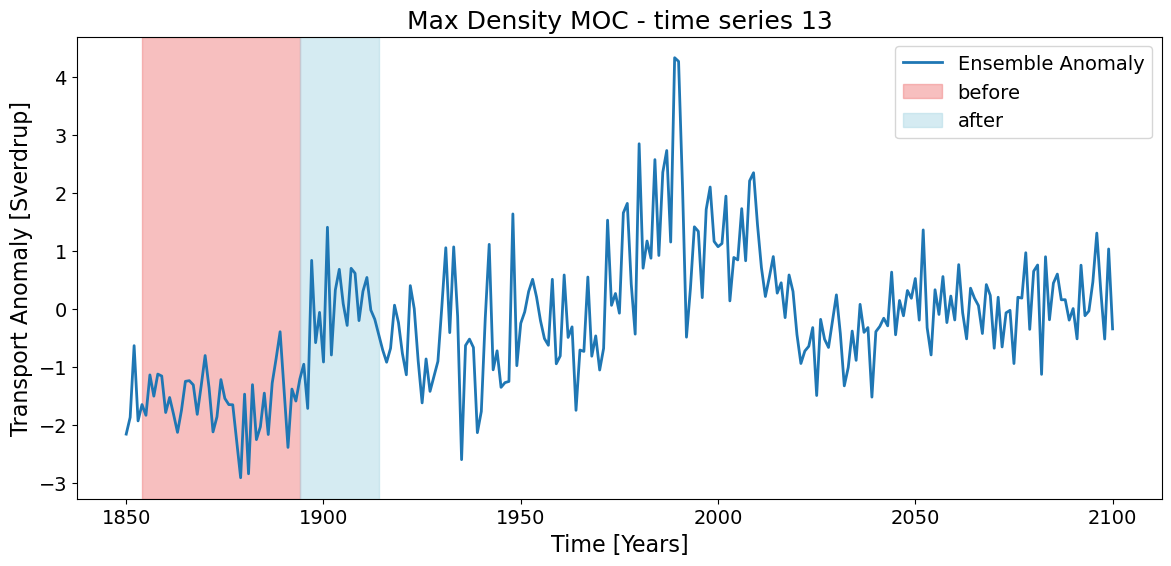

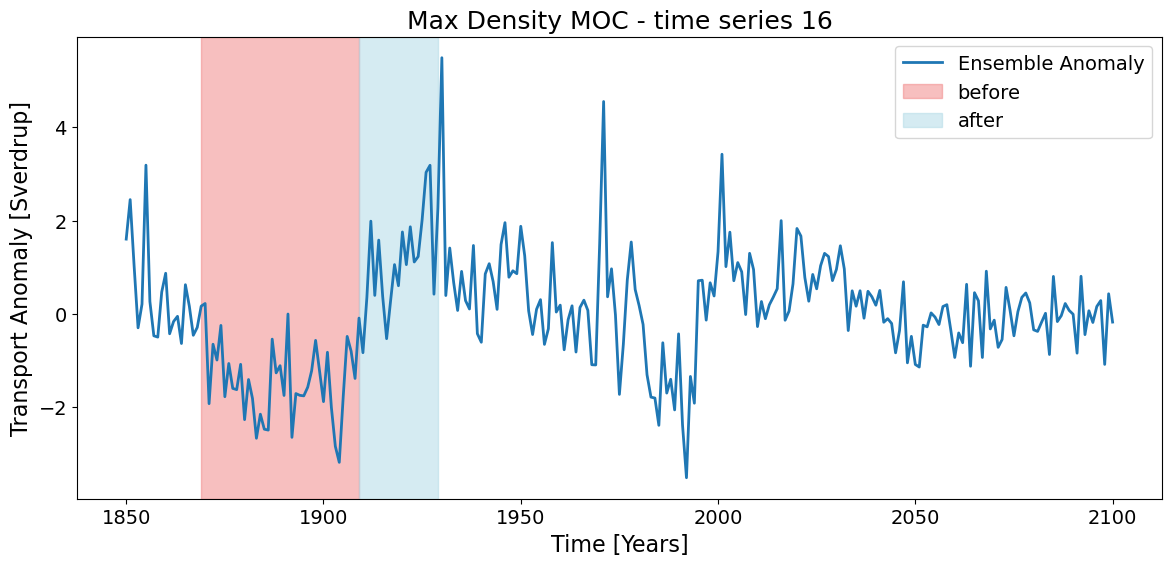

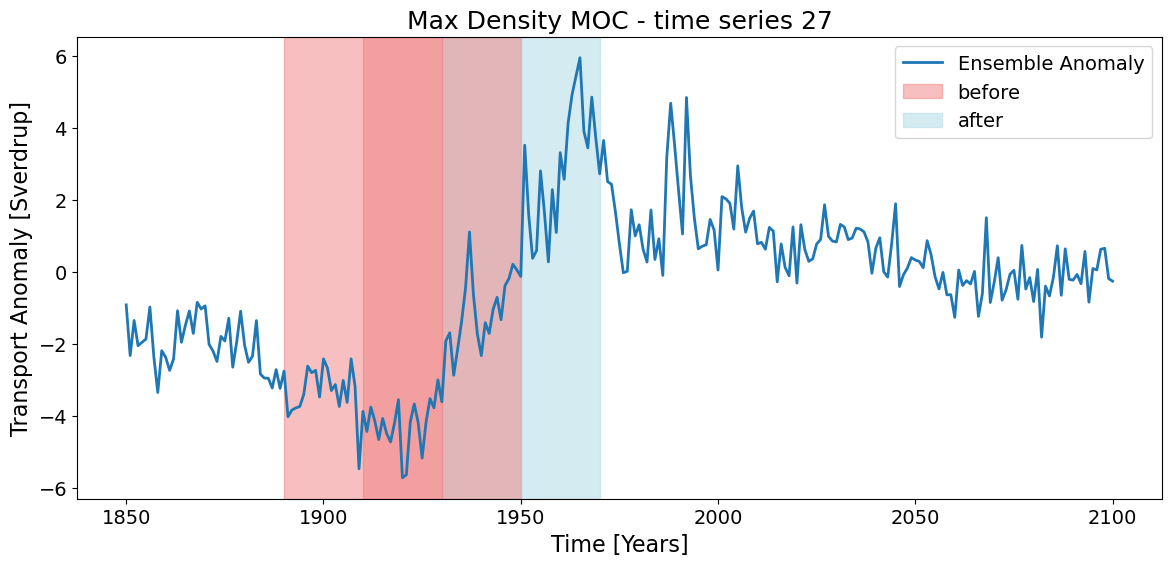

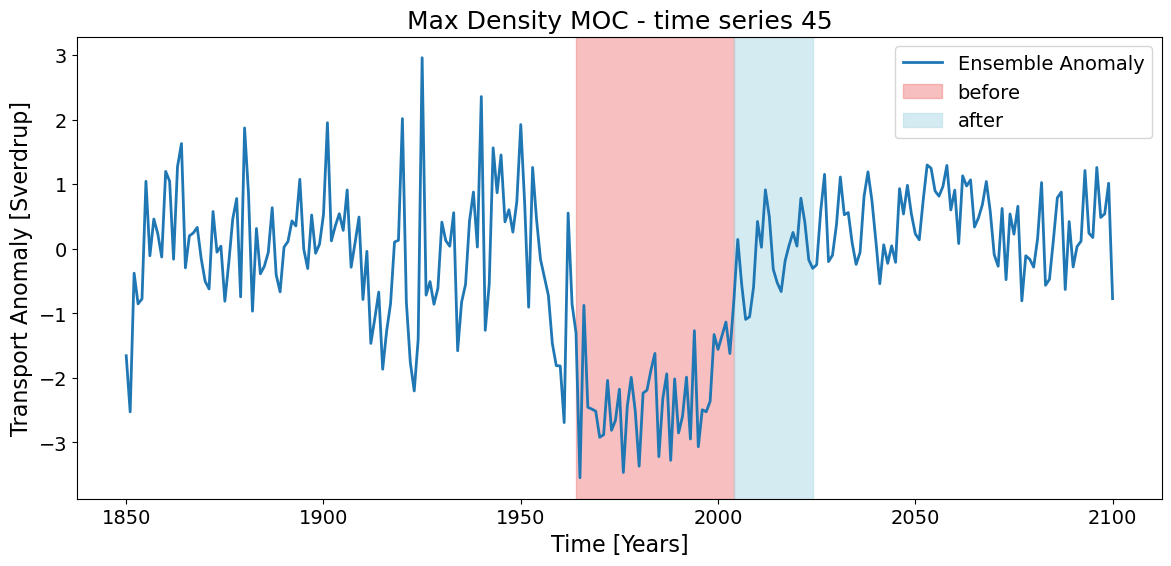

In [16]:
# Load your data
signals = np.load(files[-1])

# Get the number of time series
num_time_series = signals.shape[1]

# Define the window size
window_size = 40
# Define the duration threshold
duration_threshold = 20
# Compute entire period
period = window_size + duration_threshold

# Define the threshold factor
threshold_multiple = 3

# Define a dictionary to store criteria_indices for each i value
criteria_indices_dict = {}

# Iterate over each time series
for i in range(num_time_series):
    # Select time series
    signal = signals[:, i]

    # Calculate the annual means by averaging the values in each row
    reshaped_data = signal.reshape(-1, 12)
    annual_means = np.mean(reshaped_data, axis=1)
    
    # prepare data
    criteria_indices = []
    
    # Start after first window size
    for j in range(window_size, len(annual_means)):
        
        # Compute mean and std of compariosn window
        window = annual_means[j-window_size:j]
        std_window = np.std(window)
        avg_window = np.mean(window)

        # compute mean of range of interest
        threshold = annual_means[j:j+duration_threshold]
        avg_threshold = np.mean(threshold)
        
        # Check if the std is above the threshold
        if avg_threshold >= avg_window + (threshold_multiple * std_window) or avg_threshold <= avg_window - (threshold_multiple * std_window):
            
            if len(criteria_indices) == 0:
                criteria_indices.append(j)
                print(len(criteria_indices))
                
            elif j >= criteria_indices[-1] + duration_threshold:
                criteria_indices.append(j)
                print(len(criteria_indices))
                
        # Save criteria_indices in the dictionary
        criteria_indices_dict[i] = criteria_indices
        
    # Plot if indices list has at least one entry
    if criteria_indices:

        ## Plot 
        time_annual = np.arange(1850,1850+3012/12)
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # plot time series
        plt.plot(time_annual, annual_means, label='Ensemble Anomaly', linewidth=2)
        
        # Iterate through the indices and create axvspan for consecutive values
        start = criteria_indices[0] + 1850
        for k in range(1, len(criteria_indices)):
            if criteria_indices[k] != criteria_indices[k - 1] + 1:
                end = criteria_indices[k - 1]+duration_threshold + 1850
                ax.axvspan(start, end, alpha=0.5, color='lightblue')
                ax.axvspan(start-window_size, start, alpha=0.5, color='lightcoral')
                print('start:', start, 'end:', end)
                
                start = criteria_indices[k] + 1850

        # Add one more axvspan for the last consecutive values
        end = criteria_indices[-1]+duration_threshold + 1850
        ax.axvspan(start-window_size, start, alpha=0.5, color='lightcoral', label='before')
        ax.axvspan(start, end, alpha=0.5, color='lightblue', label='after')

        print('start:', start, 'end:', end)

        plt.title(f'Max Density MOC - time series {i}', fontsize=18)
        plt.legend(fontsize=14)
        plt.xlabel('Time [Years]', fontsize=16)
        plt.ylabel('Transport Anomaly [Sverdrup]', fontsize=16)
        ax.xaxis.set_tick_params(labelsize=14)
        ax.yaxis.set_tick_params(labelsize=14)
        
        plt.show()
        #plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'event_ts_'+str(i)+'.png', bbox_inches='tight', dpi=300)
    